# Algoritmos de optimización - Reto 2

Nombre: Antoni Climent Muñoz <br>
Github: https://github.com/antoni-climent/Retos_algoritmos_optimizacion.git <br>

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

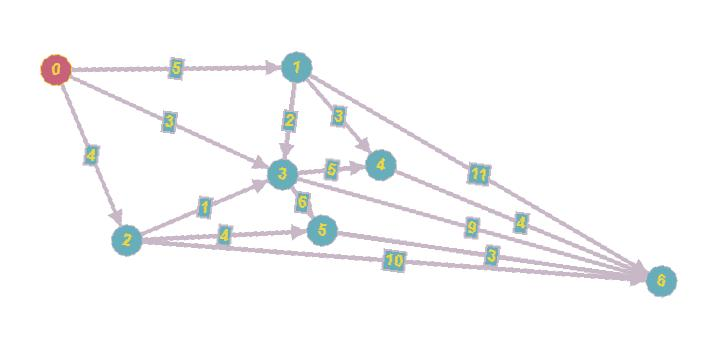

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [1]:
#Viaje por el rio - Programación dinámica
################################################################################
import numpy as np

def get_min_dist_node(dist,unvisited): # unvisited is not empty
    avail = dist[unvisited]
    return np.where(dist==min(avail))[0][0]


def dijkstra(graph, source, target):
    # Create a list of unvisited nodes 
    dist = np.array([np.inf]*len(graph))
    prev = np.array([None]*len(graph))
    dist[source] = 0
    unvisited = np.array(range(len(graph)))
    while len(unvisited) > 0:
        node = get_min_dist_node(dist,unvisited)
        if node == target:
            break
        unvisited = unvisited[unvisited != node]

        # Get index of neighbors that are not None
        neighbors = np.where(graph[node] != None)[0]
        for neighbor in neighbors:
            next_dist = dist[node] + graph[node][neighbor]
            if next_dist < dist[neighbor]:
                dist[neighbor] = next_dist
                prev[neighbor] = node
    # Return path to target
    # Reconstruct path
    path = [target]
    while path[-1] != source:
        path.append(prev[path[-1]])
    return(path[::-1])

# The matrix is the following:
print("Example1:", dijkstra(np.array([[None, 5, 3, 5],
                   [None, None, None, 4],
                   [None, None, None, 1],
                   [None, None, None, None]]), 0, 3))

print("Example2:", dijkstra(np.array([[None, 5, 3, 5],
                   [None, None, None, 4],
                   [None, None, None, 1],
                   [None, None, None, None]]), 2, 3))

print("Example3:", dijkstra(np.array([[None, 1, None, 5, None],
                   [None, None, 3, None, 1],
                   [None, None, None, 1, None],
                   [None, None, None, None, None],
                   [None, None, 1, None, None]]), 0, 3))

Example1: [0, 2, 3]
Example2: [2, 3]
Example3: [0, 1, 4, 2, 3]


## Descenso del gradiente

In [2]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [3]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

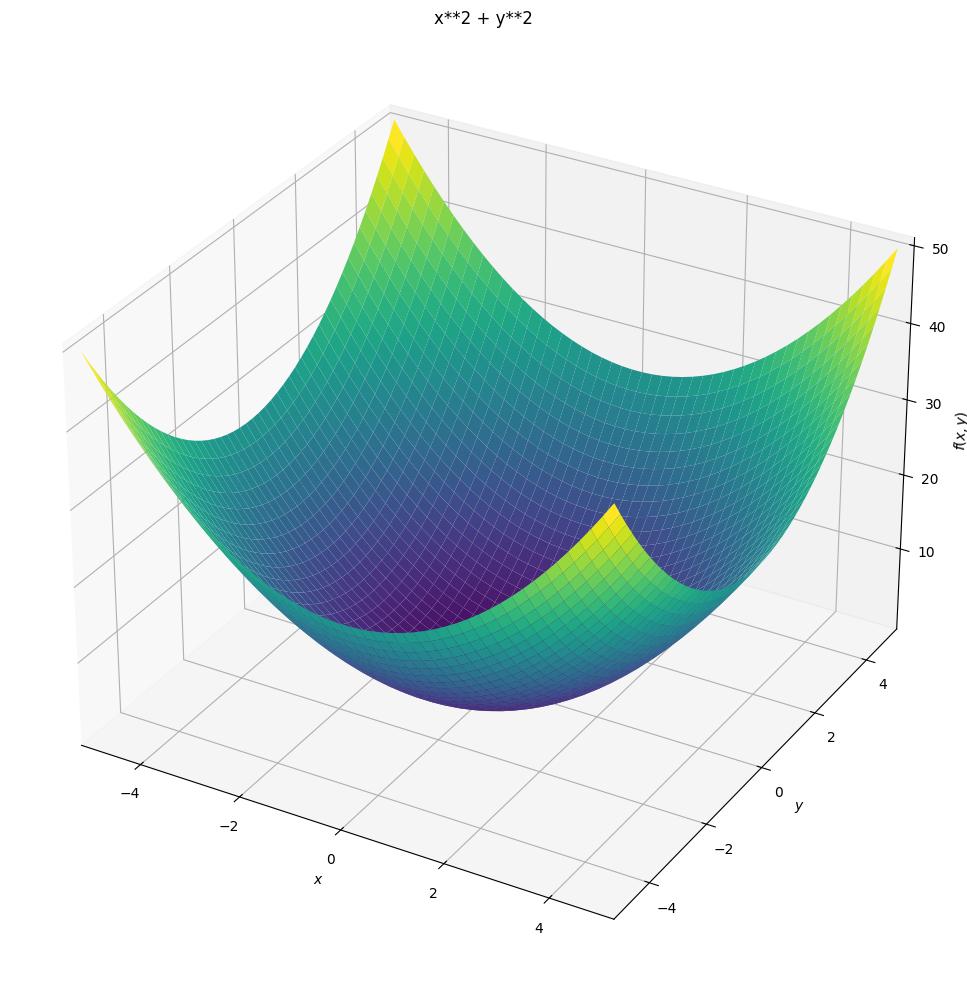

In [4]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

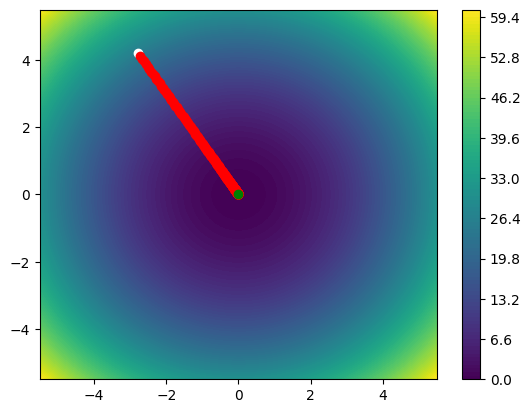

Solucion: [-4.6879179107789465e-09, 7.0882917730200815e-09] 7.222045459766621e-17


In [5]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=0.01

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
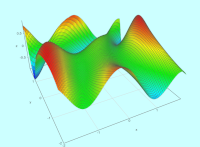


In [6]:
#Definimos la funcion
import math
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )
df = lambda X: [X[0]*math.cos(2*X[0] - math.exp(X[1]) + 1)*math.cos(X[0]**2/2 - X[1]**2/4 + 3) - 2*math.sin(2*X[0] - math.exp(X[1]) + 1)*math.sin(X[0]**2/2 - X[1]**2/4 + 3),
                math.exp(X[1])*math.sin(2*X[0] - math.exp(X[1]) + 1)*math.sin(X[0]**2/2 - X[1]**2/4 + 3) - 1/2 * X[1] * math.cos(2*X[0] - math.exp(X[1]) + 1)*math.cos(X[0]**2/2 - X[1]**2/4 + 3)]         #Gradiente
df([1,1])

[-0.8947823816559543, 0.3957070768597216]

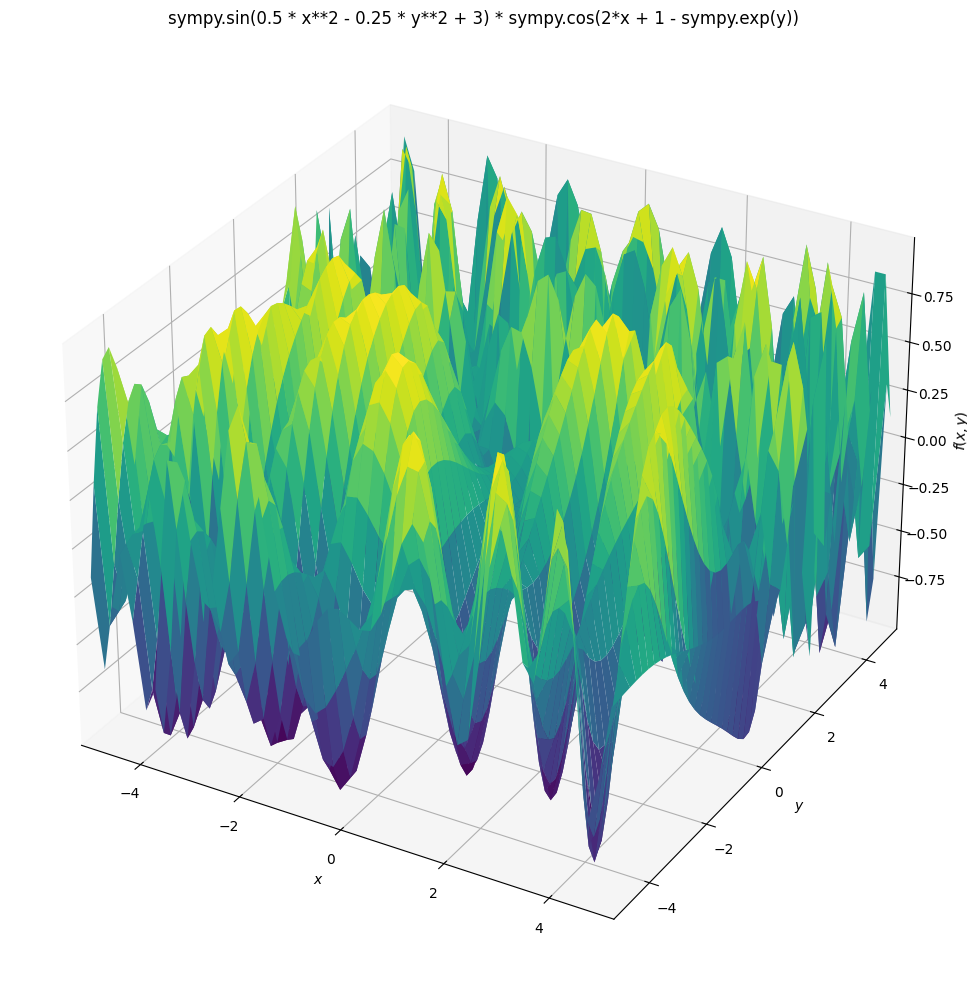

In [7]:
# Plot the function
from sympy import symbols
import sympy
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(sympy.sin(0.5 * x**2 - 0.25 * y**2 + 3) * sympy.cos(2*x + 1 - sympy.exp(y)),
       (x,-5,5),(y,-5,5),
       title='sympy.sin(0.5 * x**2 - 0.25 * y**2 + 3) * sympy.cos(2*x + 1 - sympy.exp(y))',
       size=(10,10))

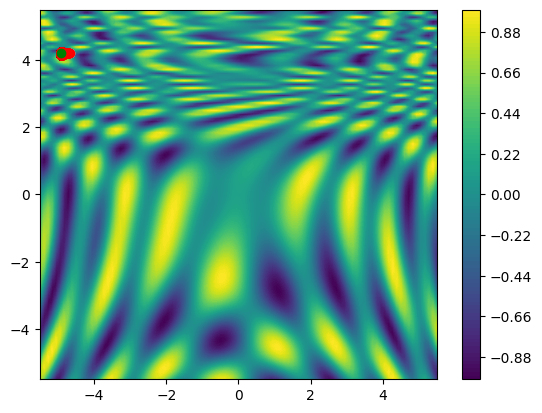

Solucion: [-4.917930793816062, 4.1977068209245125] -0.9526264422394136


In [8]:
# Now lets do the gradient descent
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=0.001

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))
